<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/nuvem_palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud matplotlib numpy pillow

=== Gerador de Nuvem de Palavras ===
Digite o caminho completo para o arquivo .txt: transcricao.txt
Deseja salvar a nuvem de palavras? (s/n): s
Digite o nome do arquivo de saída (sem extensão): catededra_USP_Folha_SP_Rafael_Fonteles
Digite o formato desejado (png/jpg): jpg
Nuvem de palavras salva como catededra_USP_Folha_SP_Rafael_Fonteles.jpg


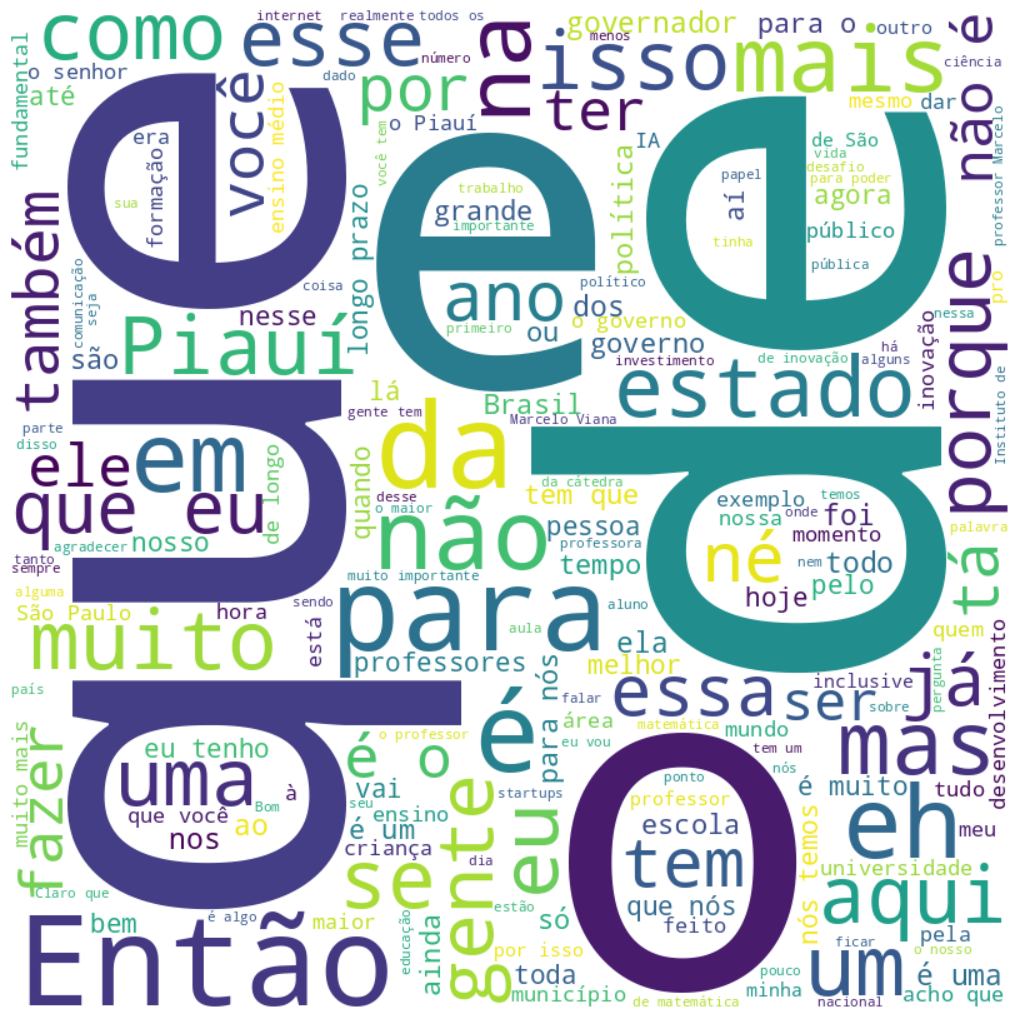

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def gerar_nuvem_palavras():
    # Solicitar o caminho do arquivo de texto
    caminho_arquivo = input("Digite o caminho completo para o arquivo .txt: ")

    # Verificar se o arquivo existe
    if not os.path.isfile(caminho_arquivo):
        print("Arquivo não encontrado. Verifique o caminho e tente novamente.")
        return

    # Ler o conteúdo do arquivo
    try:
        with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
            texto = arquivo.read()
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        return

    # Configurar a nuvem de palavras
    wordcloud = WordCloud(
        width=800,
        height=800,
        background_color='white',
        max_words=200,
        colormap='viridis',
        contour_width=3,
        contour_color='steelblue'
    ).generate(texto)

    # Mostrar a nuvem de palavras
    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Perguntar se deseja salvar a imagem
    salvar = input("Deseja salvar a nuvem de palavras? (s/n): ").lower()
    if salvar == 's':
        nome_saida = input("Digite o nome do arquivo de saída (sem extensão): ")
        formato = input("Digite o formato desejado (png/jpg): ").lower()

        if formato not in ['png', 'jpg']:
            formato = 'png'

        caminho_saida = f"{nome_saida}.{formato}"
        try:
            wordcloud.to_file(caminho_saida)
            print(f"Nuvem de palavras salva como {caminho_saida}")
        except Exception as e:
            print(f"Erro ao salvar a imagem: {e}")

    plt.show()

if __name__ == "__main__":
    print("=== Gerador de Nuvem de Palavras ===")
    gerar_nuvem_palavras()

In [3]:
!pip install nltk

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from unicodedata import normalize

In [5]:
# Baixar recursos do NLTK (apenas na primeira execução)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def verificar_recursos_nltk():
    try:
        # Verificar e baixar recursos necessários
        nltk.data.find('tokenizers/punkt')
        nltk.data.find('corpora/stopwords')
    except LookupError:
        print("Baixando recursos do NLTK (pode demorar alguns minutos na primeira execução)...")
        nltk.download('punkt')
        nltk.download('stopwords')
        nltk.download('punkt_tab')  # Específico para português

def preprocessar_texto(texto):
    # Normalizar caracteres acentuados
    texto = normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

    # Converter para minúsculas
    texto = texto.lower()

    # Remover caracteres especiais, números e múltiplos espaços
    texto = re.sub(r'[^\w\s]', ' ', texto)
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()

    # Tokenizar o texto
    try:
        tokens = word_tokenize(texto, language='portuguese')
    except:
        # Fallback para tokenização simples se houver problema com o modelo português
        tokens = texto.split()

    # Obter stop words em português
    stop_words = set(stopwords.words('portuguese'))

    # Adicionar stop words personalizadas
    palavras_irrelevantes = {
        'que', 'com', 'para', 'por', 'como', 'mais', 'mas', 'etc', 'ser', 'estar',
        'tem', 'são', 'foi', 'vai', 'meu', 'minha', 'nosso', 'nossa', 'desse', 'dessa',
        'isso', 'esse', 'esta', 'entre', 'outro', 'também', 'muito', 'já', 'até',
        'que', 'com', 'para', 'por', 'como', 'mais', 'mas', 'etc', 'ser', 'estar',
        'tem', 'são', 'foi', 'vai', 'meu', 'minha', 'nosso', 'nossa', 'desse', 'dessa',
        'isso', 'esse', 'esta', 'entre', 'outro', 'também', 'muito', 'já', 'até',
        'entao', 'voce', 'nao', 'por que', 'tambem', 'aqui', 'tudo', 'pro', 'vezes',
        'ate', 'talvez', 'chegar', 'qualquer', 'tema', 'otavio', 'muita', 'quero',
        'cada', 'pai', 'toda'
    }
    stop_words.update(palavras_irrelevantes)

    # Remover stop words e palavras muito curtas
    tokens_filtrados = [
        palavra for palavra in tokens
        if palavra not in stop_words and len(palavra) > 2
    ]

    return ' '.join(tokens_filtrados)

def gerar_nuvem_palavras():
    print("\n=== GERADOR DE NUVEM DE PALAVRAS AVANÇADO ===")
    print("(Certifique-se de que seu arquivo de texto está em UTF-8)\n")

    while True:
        caminho_arquivo = input("Digite o caminho do arquivo .txt (ou 'sair' para encerrar): ").strip()

        if caminho_arquivo.lower() == 'sair':
            print("Encerrando o programa...")
            return

        if not os.path.isfile(caminho_arquivo):
            print(f"Arquivo não encontrado: {caminho_arquivo}\n")
            continue

        try:
            with open(caminho_arquivo, 'r', encoding='utf-8') as arquivo:
                texto_original = arquivo.read()

            if not texto_original.strip():
                print("O arquivo está vazio. Por favor, selecione outro arquivo.\n")
                continue

            texto_processado = preprocessar_texto(texto_original)

            if not texto_processado.strip():
                print("O texto ficou vazio após o pré-processamento. Tente com outro arquivo.\n")
                continue

            # Configurar a nuvem de palavras
            wordcloud = WordCloud(
                width=1600,
                height=900,
                background_color='white',
                max_words=200,
                colormap='viridis',
                contour_width=1,
                contour_color='darkblue',
                stopwords=set(),
                collocations=False,
                normalize_plurals=True,
                min_font_size=8,
                max_font_size=200,
                random_state=42
            ).generate(texto_processado)

            # Mostrar a nuvem
            plt.figure(figsize=(16, 9))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")
            plt.title("Nuvem de Palavras Gerada", pad=20, fontsize=14)
            plt.tight_layout()

            # Opção para salvar
            while True:
                salvar = input("\nDeseja salvar a imagem? (s/n): ").lower()
                if salvar == 's':
                    nome_saida = input("Nome do arquivo de saída (sem extensão): ").strip()
                    if not nome_saida:
                        nome_saida = "nuvem_palavras"

                    formato = input("Formato (png/jpg/svg): ").lower()
                    if formato not in ['png', 'jpg', 'svg']:
                        formato = 'png'

                    caminho_saida = f"{nome_saida}.{formato}"
                    try:
                        wordcloud.to_file(caminho_saida)
                        print(f"\n✅ Nuvem de palavras salva com sucesso em: {caminho_saida}")
                        break
                    except Exception as e:
                        print(f"Erro ao salvar: {str(e)}. Tente novamente.")
                elif salvar == 'n':
                    break
                else:
                    print("Por favor, digite 's' ou 'n'.")

            plt.show()
            print("\n" + "="*50 + "\n")

        except UnicodeDecodeError:
            print("Erro de codificação: O arquivo deve estar em UTF-8. Tente converter seu arquivo.")
        except Exception as e:
            print(f"Ocorreu um erro inesperado: {str(e)}")



=== GERADOR DE NUVEM DE PALAVRAS AVANÇADO ===
(Certifique-se de que seu arquivo de texto está em UTF-8)

Digite o caminho do arquivo .txt (ou 'sair' para encerrar): transcricao.txt

Deseja salvar a imagem? (s/n): s
Nome do arquivo de saída (sem extensão): catededra_USP_Folha_SP_Rafael_Fonteles
Formato (png/jpg/svg): jpg

✅ Nuvem de palavras salva com sucesso em: catededra_USP_Folha_SP_Rafael_Fonteles.jpg


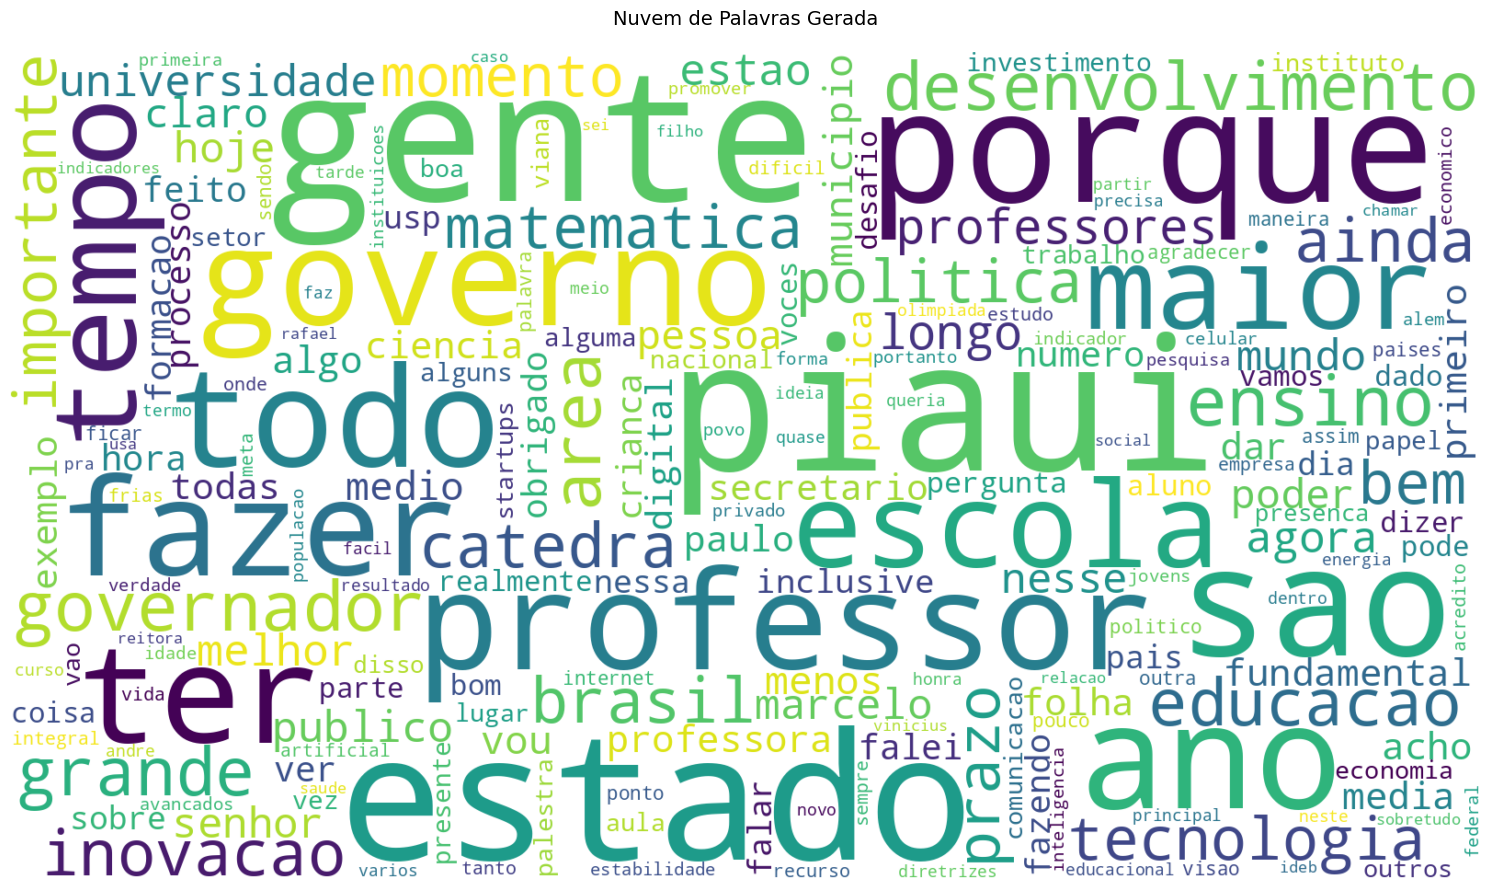

In [ ]:
if __name__ == "__main__":
    # Verificar e instalar recursos do NLTK
    verificar_recursos_nltk()

    # Executar aplicação
    gerar_nuvem_palavras()